In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
import csv
import pickle
import joblib
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
%matplotlib inline

In [2]:
training = pd.read_csv('Training.csv')
testing= pd.read_csv('Testing.csv')

In [3]:
training.head()

,skin_rash,continuous_sneezing,shivering,chills,joint_pain,acidity,vomiting,burning_micturition,fatigue,weight_loss,...,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,prognosis
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   skin_rash                     1920 non-null   int64 
 1   continuous_sneezing           1920 non-null   int64 
 2   shivering                     1920 non-null   int64 
 3   chills                        1920 non-null   int64 
 4   joint_pain                    1920 non-null   int64 
 5   acidity                       1920 non-null   int64 
 6   vomiting                      1920 non-null   int64 
 7   burning_micturition           1920 non-null   int64 
 8   fatigue                       1920 non-null   int64 
 9   weight_loss                   1920 non-null   int64 
 10  restlessness                  1920 non-null   int64 
 11  lethargy                      1920 non-null   int64 
 12  irregular_sugar_level         1920 non-null   int64 
 13  cough             

In [5]:
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']
y1= y

In [6]:
reduced_data = training.groupby(training['prognosis']).max()

In [7]:
reduced_data.head(16)

,skin_rash,continuous_sneezing,shivering,chills,joint_pain,acidity,vomiting,burning_micturition,fatigue,weight_loss,...,visual_disturbances,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails
prognosis,,,,,,,,,,,,,,,,,,,,,
Acne,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
Allergy,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Common Cold,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Diabetes,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Gastroenteritis,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Heart attack,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hypertension,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malaria,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Migraine,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


In [9]:
training.head(10)

,skin_rash,continuous_sneezing,shivering,chills,joint_pain,acidity,vomiting,burning_micturition,fatigue,weight_loss,...,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,prognosis
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
5,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
6,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
8,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
9,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


In [10]:
training['prognosis'].value_counts()

Allergy                    120
Peptic ulcer diseae        120
Diabetes                   120
Gastroenteritis            120
Hypertension               120
Migraine                   120
Malaria                    120
Typhoid                    120
Tuberculosis               120
Common Cold                120
Pneumonia                  120
Heart attack               120
Osteoarthristis            120
Acne                       120
Urinary tract infection    120
Psoriasis                  120
Name: prognosis, dtype: int64

c:\Users\23480\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prognosis', ylabel='count'>

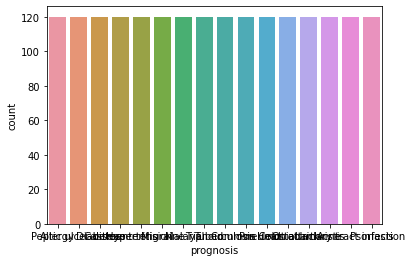

In [11]:
sns.countplot(training['prognosis'])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=62)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1440, 74), (1440,), (480, 74), (480,))

In [14]:
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)

In [15]:
clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print ("Cross Validation Mean Score for Training: ",scores.mean())
scores = cross_val_score(clf, x_test, y_test, cv=4)
print ("Cross Validation Mean Score for Testing: ",scores.mean())

print("Train Accuracy with .score method:",clf.score(x_train, y_train))
print("Test Accuracy with .score method:",clf.score(x_test, y_test))


random_seed = 1
splits = 4
#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=splits,random_state=random_seed, shuffle=True)
#results set equal to model with kfolds
results = model_selection.cross_val_score(clf, x_train, y_train,cv=kfold)
testresults = model_selection.cross_val_score(clf, x_test, y_test,cv=kfold)
#printing the averaged score over the 4 Kfolds
print("K-Fold Cross Validation")
print("Training Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Testing Accuracy: %.3f%% (%.3f%%)" % (testresults.mean()*100.0, testresults.std()*100.0))

Cross Validation Mean Score for Training:  1.0
Cross Validation Mean Score for Testing:  0.975
Train Accuracy with .score method: 1.0
Test Accuracy with .score method: 1.0
K-Fold Cross Validation
Training Accuracy: 100.000% (0.000%)
Testing Accuracy: 96.667% (1.021%)


In [16]:
pred_clf = clf.predict(x_test)

In [17]:
model_clf1 = 'model_clf1.pkl'
pickle.dump(clf1, open(model_clf1, 'wb'))

In [18]:
accuracy_score(y_test, pred_clf) 

1.0

In [19]:
with open('model_clf1.pkl', 'rb') as file:
  data = pickle.load(file)


In [20]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        33

    accuracy                           1.00       480
   macro avg       1.00   

In [21]:
model=SVC()
model.fit(x_train,y_train)
print("for svm: ")
print("Train Accuracy:",model.score(x_train, y_train))
print("Test Accuracy:",model.score(x_test, y_test))

modelscore = cross_val_score(model, x_test, y_test, cv=4)
print ("Cross Validation Score: ",modelscore.mean())

model_SVC = 'model_SVC.pkl'
pickle.dump(model, open(model_SVC, 'wb'))


random_seed = 1
splits = 4
#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=splits,random_state=random_seed, shuffle=True)
#results set equal to model with kfolds
results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold)
testresults = model_selection.cross_val_score(model, x_test, y_test,cv=kfold)
#printing the averaged score over the 4 Kfolds
print("K-Fold Cross Validation")
print("Training Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Testing Accuracy: %.3f%% (%.3f%%)" % (testresults.mean()*100.0, testresults.std()*100.0))

for svm: 
Train Accuracy: 1.0
Test Accuracy: 1.0
Cross Validation Score:  1.0
K-Fold Cross Validation
Training Accuracy: 100.000% (0.000%)
Testing Accuracy: 100.000% (0.000%)


In [22]:
pred_model = model.predict(x_test)

In [23]:
with open('model_SVC.pkl', 'rb') as file:
    data = pickle.load(file)

In [24]:
print(classification_report(y_test, pred_model))
print(confusion_matrix(y_test, pred_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        33

    accuracy                           1.00       480
   macro avg       1.00   

In [25]:
testing.head(16)

,skin_rash,continuous_sneezing,shivering,chills,joint_pain,acidity,vomiting,burning_micturition,fatigue,weight_loss,...,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,prognosis
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Diabetes
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypertension
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Migraine
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
7,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Typhoid
8,0,0,0,1,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Tuberculosis
9,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Common Cold


In [26]:
testcols= testing.columns
testcols= testcols[:-1]
testingx = testing[testcols]
testingy = testing['prognosis']

In [27]:
testingy.head(10)

0                Allergy
1    Peptic ulcer diseae
2              Diabetes 
3        Gastroenteritis
4          Hypertension 
5               Migraine
6                Malaria
7                Typhoid
8           Tuberculosis
9            Common Cold
Name: prognosis, dtype: object

In [28]:
testingx.shape

(16, 74)

In [29]:
testle = preprocessing.LabelEncoder()
testle.fit(testingy)
testingy = testle.transform(testingy)

In [30]:
predtest_clf = clf.predict(testingx)

In [31]:
print(classification_report(testingy, predtest_clf))
print(confusion_matrix(testingy, predtest_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1

    accuracy                           1.00        16
   macro avg       1.00   

In [32]:
predtest_model = model.predict(testingx)

In [33]:
print(classification_report(testingy, predtest_model))
print(confusion_matrix(testingy, predtest_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1

    accuracy                           1.00        16
   macro avg       1.00   

In [34]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

In [35]:
print(importances)

[0.05495296 0.0046145  0.         0.         0.         0.06621671
 0.         0.         0.00177809 0.         0.         0.
 0.         0.         0.         0.06544685 0.00280913 0.
 0.00537298 0.         0.         0.         0.         0.06986057
 0.         0.         0.         0.06507512 0.         0.
 0.         0.         0.06439003 0.         0.         0.
 0.         0.04977829 0.06934234 0.         0.         0.
 0.         0.         0.06373252 0.         0.         0.06241593
 0.         0.         0.00287087 0.0590264  0.06162279 0.00265478
 0.         0.00211148 0.         0.06437401 0.         0.01511379
 0.         0.07150219 0.         0.00695694 0.         0.
 0.         0.         0.00290174 0.         0.         0.00428646
 0.06079256 0.        ]


In [36]:
print(indices)

[61 23 38  5 15 27 32 57 44 47 52 72 51  0 37 59 63 18  1 71 68 50 16 53
 55  8 24 25 19 22 21  2 20  3 17  9  4 14  6 13 12  7 11 10 26 73 28 29
 70 69 67 66 65 64 62 60 58 56 54 49 48 46 45 43 42 41 40 39 35 34 33 31
 30 36]


In [37]:
print(features)

Index(['skin_rash', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'acidity', 'vomiting', 'burning_micturition', 'fatigue', 'weight_loss',
       'restlessness', 'lethargy', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'nausea', 'loss_of_appetite',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
       'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'fast_heart_rate', 'neck_pain', 'dizziness', 'obesity',
       'excessive_hunger', 'knee_pain', 'hip_joint_pain', 'stiff_neck',
       'swelling_joints', 'loss_of_balance', 'loss_of_smell',
       'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine',
       'passage_of_gases', 'internal_itching', 'toxic_look_(typh

In [38]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

In [39]:
symptoms_dict = {}

In [40]:
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index


In [41]:
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from a doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


In [42]:
def getDescription():
    global description_list
    with open('symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [43]:
def getSeverityDict():
    global severityDictionary
    with open('Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _diction={row[0]: int(row[1])}
            severityDictionary.update(_diction)

In [44]:
def getprecautionDict():
    global precautionDictionary
    with open('symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)

In [45]:
def getInfo():
    
    print("Your Name \n\t\t\t\t\t\t",end="->")
    name=input("")
    print("Hello ",name)

In [46]:
def check_pattern(dis_list,inp):
    import re
    pred_list=[]
    ptr=0
    patt = "^" + inp + "$"
    regexp = re.compile(inp)
    for item in dis_list:

        if regexp.search(item):
            pred_list.append(item)
            # return 1,item
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return ptr,item

In [47]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)
    
    symptoms_dict = {}
    
    for index, symptom in enumerate(X):
        symptoms_dict[symptom] = index
    
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
        input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])


In [48]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return disease

In [49]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    # print(tree_)
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []
    
    while True:

        print("Enter the symptom you are experiencing  "
      "\n Replace space with underscore e.g body_pain "
      "\n When asked follow up questions fill yes/no "
      "\n\t\t\t\t\t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            
        else:
            print("Enter valid symptom.")
    while True:
        try:
            num_days=int(input("Okay. For how many days ? : "))
            break
        except:
            print("Enter number of days.")
            
            
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])

            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]

            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)
                    
            second_prediction=sec_predict(symptoms_exp)
           
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])

                print(description_list[present_disease[0]]) 
                
                
            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)
    
    
    recurse(0, 1)

In [50]:
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)

Your Name 
						->

KeyboardInterrupt: Interrupted by user